# Pipeline
## Elaborado por: Martín Ordóñez


In [1]:
import pandas as pd
import numpy as np
# Para escalar datos
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Para esta tarea use las siguientes fuentes:

#https://www.kaggle.com/shubh247/abalone-age-prediction/notebook
#https://dphi.tech/notebooks/191/mamun216/abalone-age-prediction

In [64]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Track Machine Learning I/Introducción to Machine Learning/KNN/abalone.data')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
#Edad se calcula sumando 1.5 a los anillos
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [7]:
df.age.describe()

count    4177.000000
mean       11.433684
std         3.224169
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: age, dtype: float64

In [9]:
numerical_features = df.select_dtypes(include = [np.number]).columns
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [10]:
categorical_features = df.select_dtypes(include = [np.object]).columns
categorical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Index(['Sex'], dtype='object')

In [6]:
y = df.loc[:, ['age']]

In [8]:
X = df.loc[:, ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex']]
print(X.shape)

(4177, 8)


In [9]:
X = pd.get_dummies(X)
print(X.shape)

(4177, 10)


In [10]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [11]:
error = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

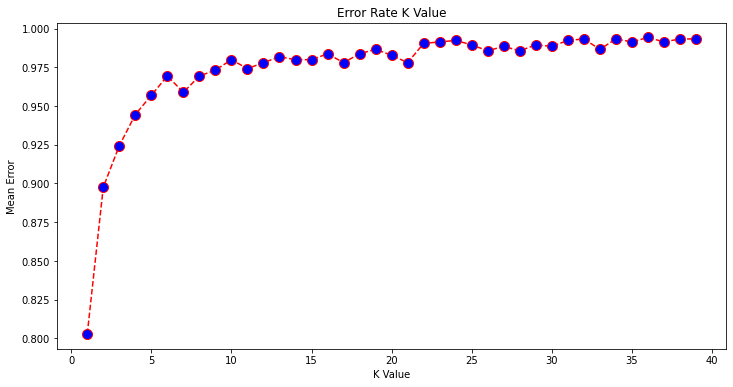

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### KNN regression

In [17]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors =2))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=2))])

In [18]:
#Evaluar modelos
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.7906153609324469
Testing accuracy: 0.3596897945738343


In [19]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors =3))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [16]:
#Evaluar modelos
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.7132217386664322
Testing accuracy: 0.43465335753722345


### KNN Clasifier


In [65]:

X = df.loc[:, ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight','Rings']].values

In [66]:
y = df.loc[:, ['Sex']].values

In [67]:

X.shape

(4177, 8)

In [68]:
y.shape

(4177, 1)

In [69]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [70]:

from sklearn.neighbors import KNeighborsClassifier

In [71]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors =3))
pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [72]:
#Evaluar modelos
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.7503192848020435
Testing accuracy: 0.5062200956937799


#### ¿Por qué querrías ocupar una tubería para KNN?

Para optimizar el código

#### ¿Para qué otros modelos o tareas sería útil usar una tubería?

Para todos lo modelos, ya que así se puede realizar más rápido las operaciones y el ajuste de hiperparámetros